In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv


**Разведочный анализ данных (EDA)**

1. Загрузка данных

In [2]:
file = '/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv'
data = pd.read_csv(file)
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


2. Оценка данных и поиск нулевых значений

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
print('Нулевые значения в датасете')
data.isnull().sum()

Нулевые значения в датасете


student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Как видно, в датасете присутствуют нулевые значения в столбце с информацией об уровне образования родителей.

Заполним пропуски предыдущими значениями в столбце:

In [5]:
data.ffill(inplace=True)

Также удалим столбец "student_id", поскольку он не несёт в себе важную информацию

In [6]:
data.drop('student_id', axis=1, inplace=True)

Проверим данные на наличие дубликатов:

In [7]:
data.duplicated().sum()

0

Дубликаты отсутствуют.

**Таким образом, дополнительная обработка данных (очистка дубликатов, обработка нулевых значений) не требуется.**

3. Одномерный анализ

Определим категориальные переменные и построим для них столбчатые диаграммы, чтобы визуально определить распределение значений.

In [8]:
categorical_columns = data.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

# Список числовых, но категориальных (если мало уникальных значений)
numeric_but_categorical = [
    col for col in data.select_dtypes(include=['int64', 'float64']).columns
    if data[col].nunique() < 10
]

all_categorical = categorical_columns + numeric_but_categorical

print("Категориальные столбцы:", all_categorical)

Категориальные столбцы: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation', 'age', 'exercise_frequency']


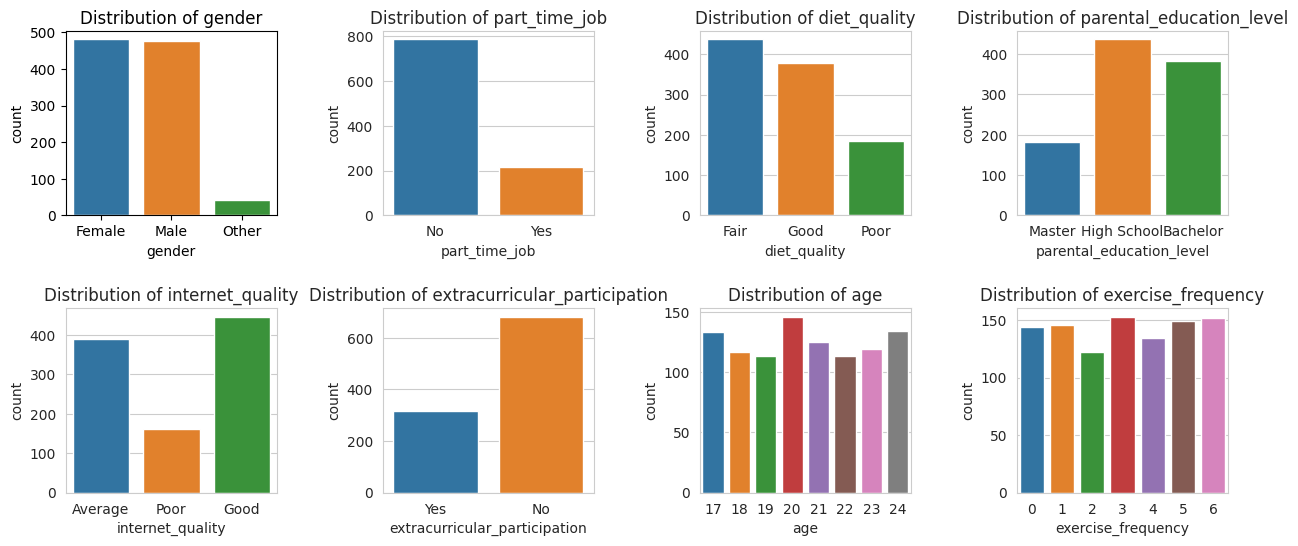

In [9]:
plt.figure(figsize=(15,6))

for a, col in enumerate(all_categorical, 1):
    plt.subplot(2, 4, a)
    sns.set_style('whitegrid')
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}", pad=5)


plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Из полученных графиков можно выделить следующее:
- среди студентов преобладают те, у которых нет работы с частичной занятостью;
- у большинства родителей есть, как минимум, образование на уровне старшей школы;
- большая часть не участвуют во внеклассных мероприятиях.

4. Двумерный анализ

Исследуем, есть ли какая-либо корреляция между отдельными столбцами, которые следует учитывать при дальнейшей работе.

In [10]:
num_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
               'attendance_percentage', 'sleep_hours', 'exercise_frequency',
               'mental_health_rating', 'exam_score']

Построим диаграмму рассеивания, чтобы посмотреть, как успеваемость зависит от многих характеристик студента (возраст, ментальное здоровье, время проведения в соц.сетях и т.д.)

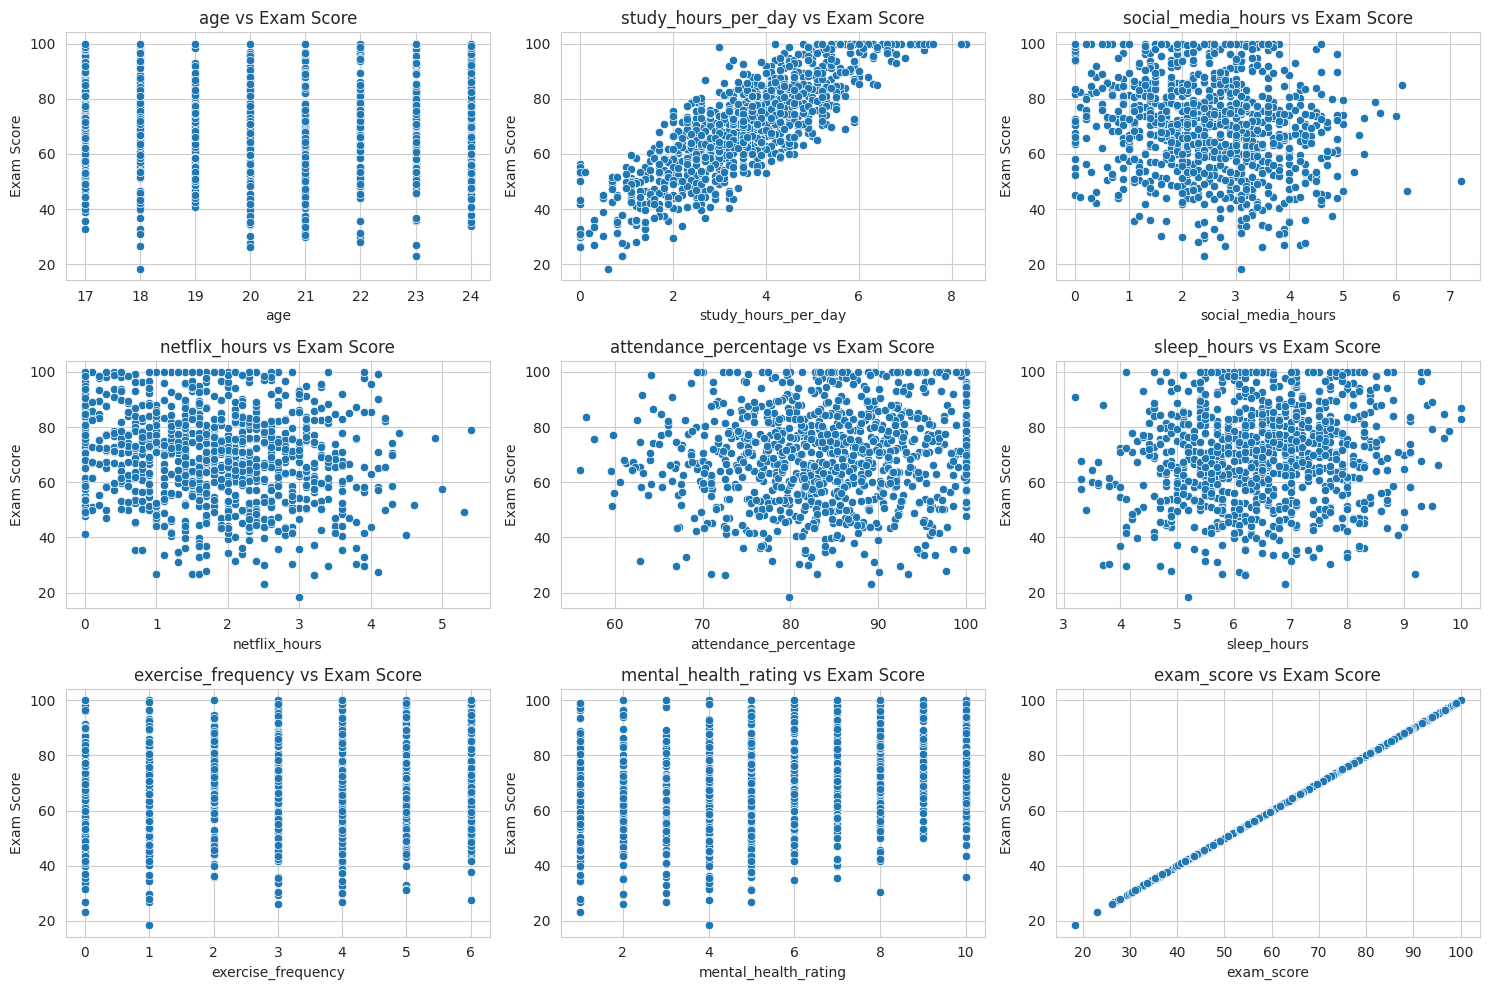

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[col], y=data['exam_score'])
    plt.title(f'{col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    
plt.tight_layout()
plt.show()

**Таким образом, можно сделать вывод, что количество часов учебы в день и посещаемость имеют положительную корреляцию с оценками за экзамены, в то время как другие факторы, такие как использование социальных сетей, количество часов сна, частота занятий спортом и оценка психического здоровья, не имеют явной зависимости с оценками за экзамены.**

5. Многомерный анализ

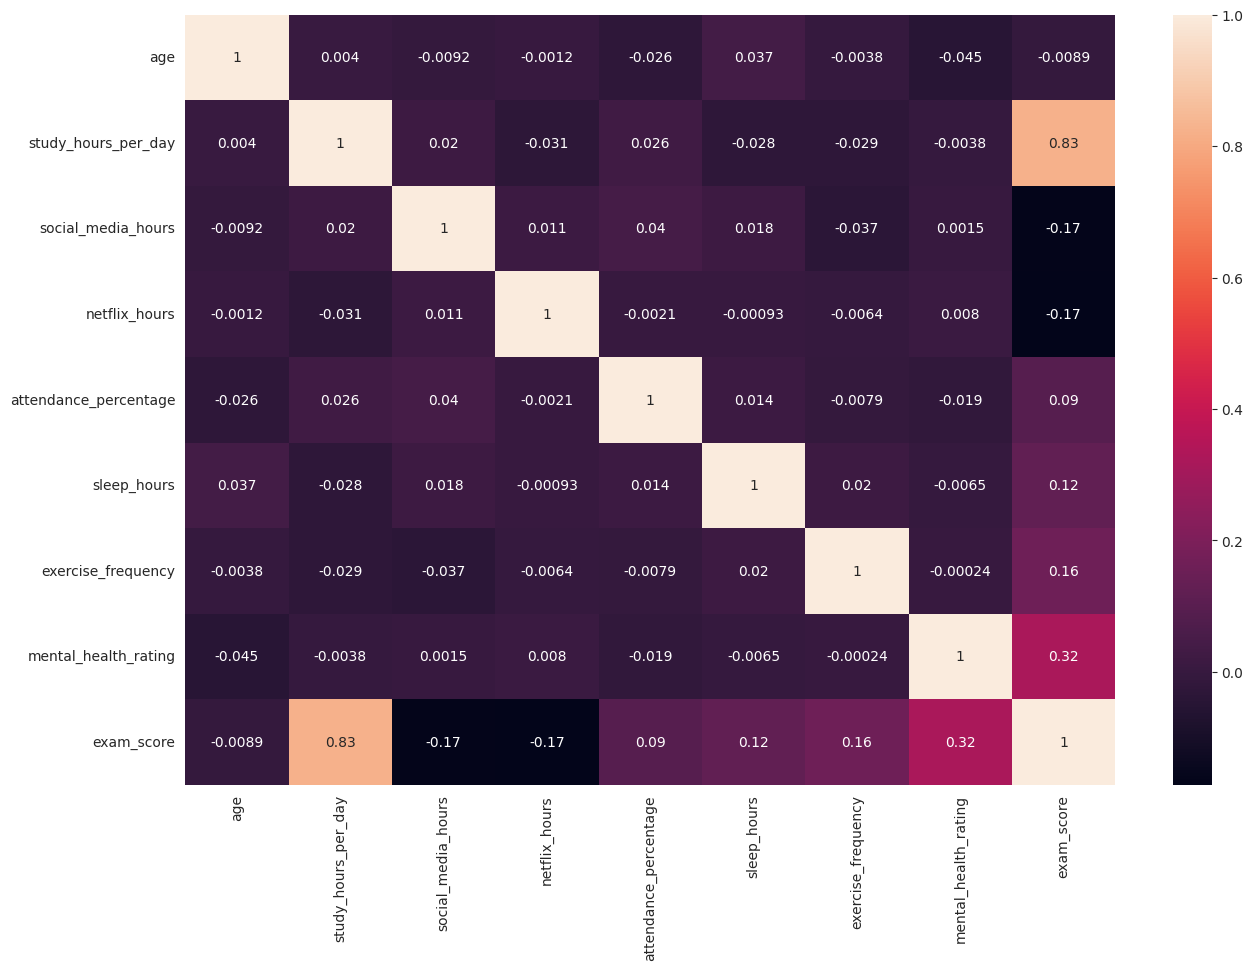

In [12]:
corr = data[num_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

plt.show()

Многомерный анализ показал сильную корреляцию между количеством учебных часов в день и успеваемостью студентов.

**Предобработка данных**

1. Кодировка меток

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
data_encoding = data.copy()

#столбцы, у которых категорий больше двух, для кодировки методом Label Encoding
label_columns = ['diet_quality', 'parental_education_level', 'internet_quality']
le = LabelEncoder()

for col in label_columns:
    data_encoding[col] = le.fit_transform(data_encoding[col])

#столбцы, у которых категорий  не больше двух, для кодировки методом One-Hot Encoding
one_hot_columns = ['gender', 'part_time_job', 'extracurricular_participation']
data_encoding = pd.get_dummies(data_encoding, columns=one_hot_columns) 

data_encoding.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,exam_score,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,extracurricular_participation_No,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,0,6,2,0,8,56.2,True,False,False,True,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,1,6,1,0,8,100.0,True,False,False,True,False,True,False
2,21,1.4,3.1,1.3,94.8,8.0,2,1,1,2,1,34.3,False,True,False,True,False,True,False
3,23,1.0,3.9,1.0,71.0,9.2,2,4,2,1,1,26.8,True,False,False,True,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,0,3,2,1,1,66.4,True,False,False,True,False,True,False


2. Отделим целевой признак

In [15]:
X = data_encoding.drop('exam_score', axis=1)
y = data_encoding['exam_score']

3. Стандартизация признаков

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

4. Разбиение данных на тестовые и обучающие в соотношении 80/20

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

5. Выбор наилучшей модели для решения задачи регрессии

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
model = {
    'Random Forest': RandomForestRegressor(max_depth=5, random_state=0),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

In [20]:
metrics = {}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    metrics[name] = {'R²': r2, 'RMSE': rmse}
    
data_metrics = pd.DataFrame(metrics).T


print(data_metrics)

                     R²      RMSE
Random Forest  0.810723  6.966785
Lasso          0.897230  5.133545
Ridge          0.896725  5.146138


Оценка модели: R2 (R-квадрат) и RMSE (среднеквадратичная ошибка)

Чтобы определить, какая модель является лучшей, посмотрим как на R2 (R-квадрат), так и на RMSE (среднеквадратичная ошибка), которые оба являются важными показателями для оценки регрессионных моделей:

**R2:** показывает, насколько хорошо прогнозы модели соответствуют фактическим данным. Значение, близкое к 1, предполагает лучшее соответствие.

**RMSE (среднеквадратичная ошибка):** измеряет среднюю величину ошибок между прогнозируемыми и фактическими значениями. Более низкий RMSE указывает на более высокую производительность, поскольку это означает, что прогнозы модели ближе к истинным значениям.

**Вывод**

Lasso - лучшая модель здесь, потому что:

У него самый высокий R2 (указывает на то, что он объясняет наибольшую дисперсию в данных).
У него самый низкий RMSE (указывает на то, что он допускает наименьшие ошибки прогнозирования).

6. Визуализация результатов

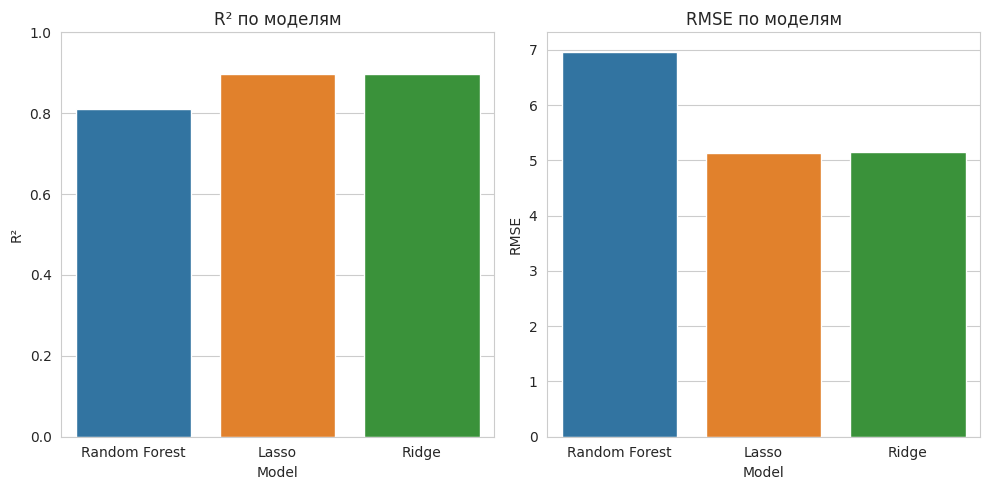

In [21]:
results = {
    "Model": data_metrics.index.tolist(),
    "R²": data_metrics['R²'].values,
    "RMSE": data_metrics['RMSE'].values
}
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df_results, x='Model', y='R²')
plt.title('R² по моделям')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
sns.barplot(data=df_results, x='Model', y='RMSE')
plt.title('RMSE по моделям')
plt.tight_layout()
plt.show()